<a href="https://colab.research.google.com/github/ishamishra30/twitter-sentiment-analysis/blob/main/groupb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HEART DISEASE

datacleaning and error correcting

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/csv/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
df.ca.unique

<bound method Series.unique of 0       None
1       None
2       None
3       None
4       None
        ... 
1020    None
1021    None
1022    None
1023    None
1024    None
Name: ca, Length: 1025, dtype: object>

In [ ]:
df.thal.unique

<bound method Series.unique of 0       None
1       None
2       None
3       None
4       None
        ... 
1020    None
1021    None
1022    None
1023    None
1024    None
Name: thal, Length: 1025, dtype: object>

In [ ]:
df['ca']= df['ca'].replace({0: 'NAN'})
df['thal']= df['thal'].replace({0: 'NAN'})

In [ ]:
df[['ca','thal']]

,ca,thal
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
1020,None,None
1021,None,None
1022,None,None
1023,None,None


Data integration

In [ ]:
subset1= df[["age", "sex", "chol"]]
subset1

,age,sex,chol
0,52,1,212
1,53,1,203
2,70,1,174
3,61,1,203
4,62,0,294
...,...,...,...
1020,59,1,221
1021,60,1,258
1022,47,1,275
1023,50,0,254


In [ ]:
subset2= df[["age", "thal", "fbs"]]
subset2

,age,thal,fbs
0,52,None,0
1,53,None,1
2,70,None,0
3,61,None,0
4,62,None,1
...,...,...,...
1020,59,None,0
1021,60,None,0
1022,47,None,0
1023,50,None,0


In [ ]:
pd.merge(subset1, subset2)

,age,sex,chol,thal,fbs
0,52,1,212,None,0
1,52,1,212,None,1
2,52,1,212,None,0
3,52,1,212,None,0
4,52,1,212,None,0
...,...,...,...,...,...
35206,74,0,269,None,0
35207,74,0,269,None,0
35208,74,0,269,None,0
35209,74,0,269,None,0


Data Transformation

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
target        int64
dtype: object

In [ ]:
df['chol'].astype('float')

0       212.0
1       203.0
2       174.0
3       203.0
4       294.0
        ...  
1020    221.0
1021    258.0
1022    275.0
1023    254.0
1024    188.0
Name: chol, Length: 1025, dtype: float64

In [ ]:
##df['sex'].astype('string')

In [ ]:
df['sex']= df['sex'].replace({0: 'M'})
df['sex']= df['sex'].replace({1: 'F'})
df['sex']

0       F
1       F
2       F
3       F
4       M
       ..
1020    F
1021    F
1022    F
1023    M
1024    F
Name: sex, Length: 1025, dtype: object

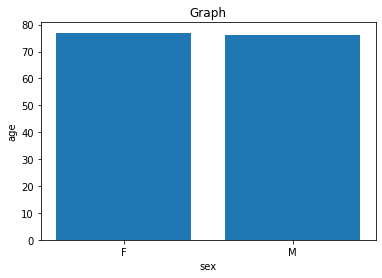

In [ ]:
x=df.sex
y=df.age
plt.title("Graph")
plt.xlabel("sex")
plt.ylabel("age")
plt.bar(x,y)
plt.show()

MODEL BUILDING

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#logistic regression to predict target
logistic=LogisticRegression()
logistic.fit(train_x,train_y)
prediction=logistic.predict(test_x)
acc=accuracy_score(test_y,prediction)

ValueError: ignored